2) Data Wrangling II

Create an “Academic performance” dataset of students and perform the following operations using
Python.
1. Scan all variables for missing values and inconsistencies. If there are missing values and/or
inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques
to deal with them.
3. Apply data transformations on at least one of the variables. The purpose of this
transformation should be one of the following reasons: to change the scale for better
understanding of the variable, to convert a non-linear relation into a linear one, or to decrease
the skewness and convert the distribution into a normal distribution.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import Normalizer

## Creating a function to fill future marks for a student using his previous record


In [2]:
def predict_marks(test,test_total,next_test_total):
    result = []
    limits = ((next_test_total*10)/100)
    for i in range(len(test)):
        noise = np.random.randint(-limits,limits)
        predicted = int((test[i]*next_test_total)/test_total) + noise
        result.append(predicted)
    result = np.array(result)
    return result

In [3]:
no = 75
Students = {'Roll No':np.arange(1,no+1),
            'Unit Test-I':np.random.randint(low=5,high=20,size=no)}

In [4]:
Students['Insemester'] = predict_marks(Students['Unit Test-I'],20,30)
Students['Unit Test-II'] = predict_marks(Students['Insemester'],30,20)
Students['Endsemester'] = predict_marks(Students['Unit Test-II'],20,70)

## Loading the dataset into the DataFrame


In [5]:
df = pd.DataFrame(Students)

In [6]:
# Sorting in descending
df.sort_values(by=['Endsemester'],ascending=False)[0:10]

,Roll No,Unit Test-I,Insemester,Unit Test-II,Endsemester
3,4,18,28,19,69
62,63,17,27,19,66
41,42,19,25,17,65
55,56,19,27,17,63
47,48,15,23,16,62
66,67,19,27,18,62
9,10,16,26,17,59
73,74,15,24,16,57
36,37,18,25,17,56
6,7,19,27,16,55


## Handling outliers

In [7]:
outlier1 = [34,23]
outlier2 = [35,71]
for i in range(len(outlier1)):
    df.loc[df['Roll No']==outlier1[i],['Insemester','Endsemester']] = [-50,-95]

In [8]:
for i in range(len(outlier2)):
    df.loc[df['Roll No']==outlier2[i],['Insemester','Endsemester']] = [50,95]

In [9]:
df['Total'] = df['Endsemester']+df['Insemester']

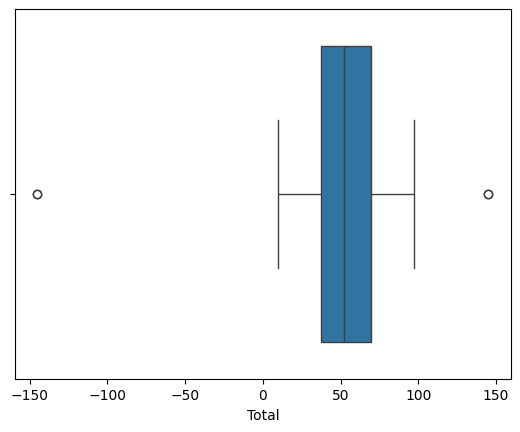

In [10]:
# Visualizing outliers
sns.boxplot(df['Total'],orient='h',showfliers=True)
plt.show()

In [11]:
# Original shape
df.shape

(75, 6)

In [12]:
Q1 = df['Total'].quantile(0.25)
Q3 = df['Total'].quantile(0.75)
IQR = Q3-Q1

In [13]:
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
upper_array = np.where(df['Total']>=upper)[0]
lower_array = np.where(df['Total']<=lower)[0]
#upper_array = np.delete(upper_array,1) # Exceptional student
print(upper_array)
print(lower_array)

[34 70]
[22 33]


In [14]:
# Dropping outliers
df.drop(index=upper_array,inplace=True)
df.drop(index=lower_array,inplace=True)
print("Deleted ouliers!")

Deleted ouliers!


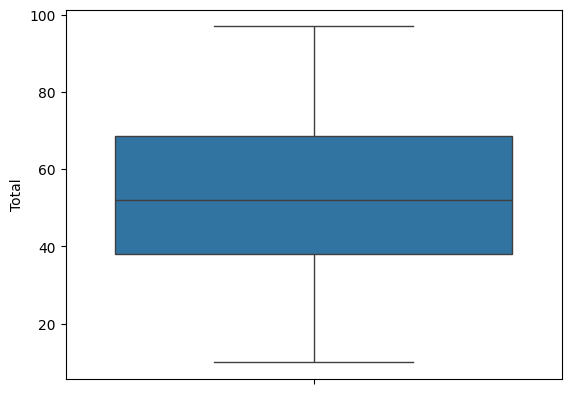

In [15]:
sns.boxplot(df['Total'])
plt.show()

In [16]:
# Unit Test Total
df['Unit Test Total'] = df['Unit Test-I']+df['Unit Test-II']

## Skewness

<ipython-input-17-3acd62e968e0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['Total'])


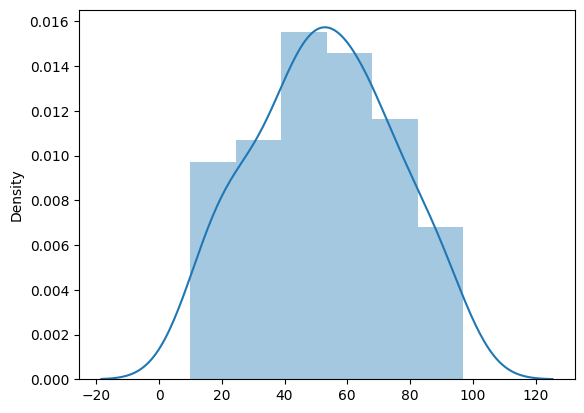

In [17]:
# Visually look at the skewness in the graph
sns.distplot(x=df['Total'])
plt.show()

In [18]:
# Skewness measure indicates assymetric behaviour
# Skewness = 0: Then normally distributed.
# Skewness > 0: Then more weight in the left tail of the distribution.
# Skewness < 0: Then more weight in the right tail of the distribution.
original_skewness = stats.skew(df['Total'],bias=True)
print("Original Skewness: ",original_skewness)

Original Skewness:  -0.00368872651082356


In [19]:
# Apply sqrt transformation
transformed_data = np.sqrt(df['Total'])

# Calculate skewness after transformation
transformed_skewness = stats.skew(transformed_data)
print("Transformed Skewness: ",transformed_skewness)

Transformed Skewness:  -0.4630343269353213


In [20]:
# Applying box-cox transformation
total = df['Total']
skewness_before = stats.skew(total)
print(skewness_before)

-0.00368872651082356


In [21]:
transformed_data,lambda_value = stats.boxcox(total)

In [22]:
skewness_after = stats.skew(transformed_data)
print(skewness_after)

-0.13082986613829184


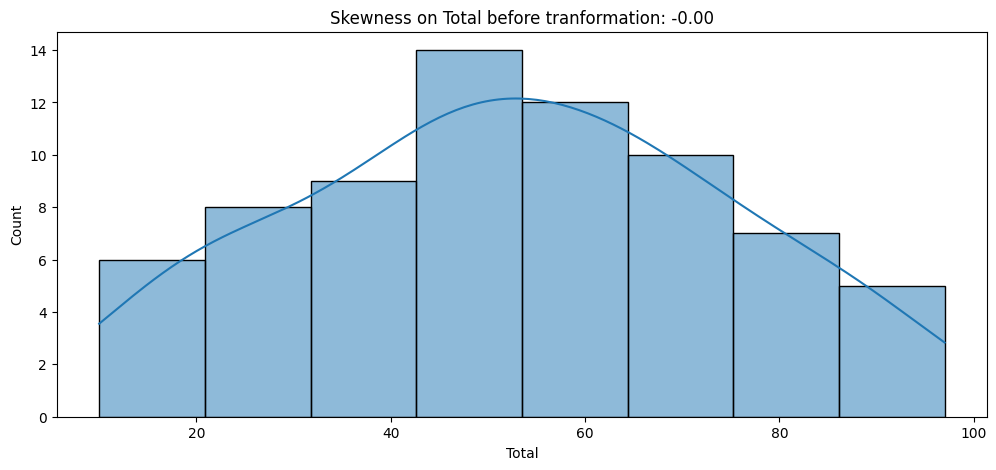

In [23]:
# Plotting original and normal distribution
plt.figure(figsize=(12,5))
sns.histplot(total,kde=True)
plt.title(f"Skewness on Total before tranformation: {skewness_before:.2f}")
plt.show()

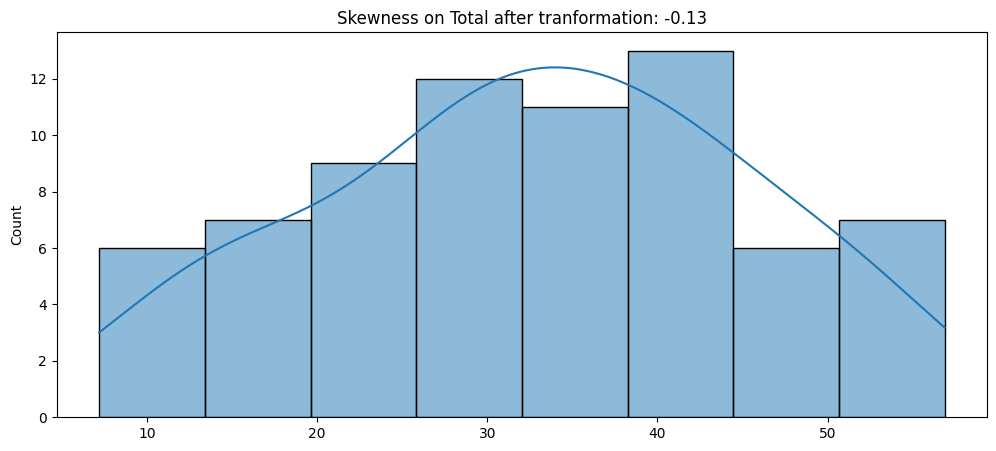

In [24]:
plt.figure(figsize=(12,5))
sns.histplot(transformed_data,kde=True)
plt.title(f"Skewness on Total after tranformation: {skewness_after:.2f}")
plt.show()

## Normalizing the data

In [25]:
# Scaling Total and UT Total values to comparable values
scaler = Normalizer()
columns = pd.DataFrame(data=df,columns=['Total','Unit Test Total'])
scaled_data = scaler.fit_transform(columns)
scaled_df = pd.DataFrame(scaled_data,columns=['total','UT total'])
scaled_df.head(10)

,total,UT total
0,0.919145,0.393919
1,0.922669,0.385593
2,0.913009,0.407940
3,0.934335,0.356396
4,0.929416,0.369033
5,0.911371,0.411587
6,0.919724,0.392565
7,0.925020,0.379919
8,0.932005,0.362446
9,0.932210,0.361917


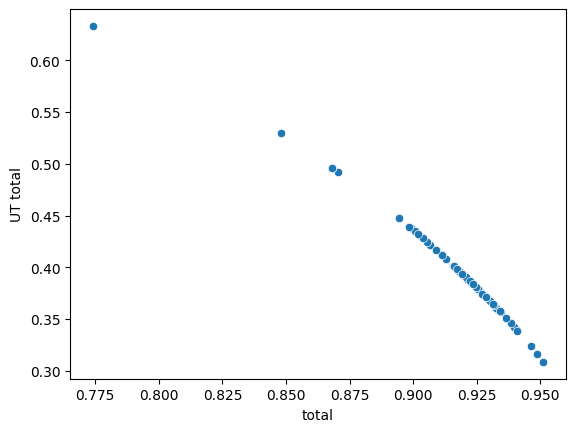

In [26]:
sns.scatterplot(x='total',y='UT total',data=scaled_df)
plt.show()

<ipython-input-27-19d813f2d42a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=scaled_df['total'])


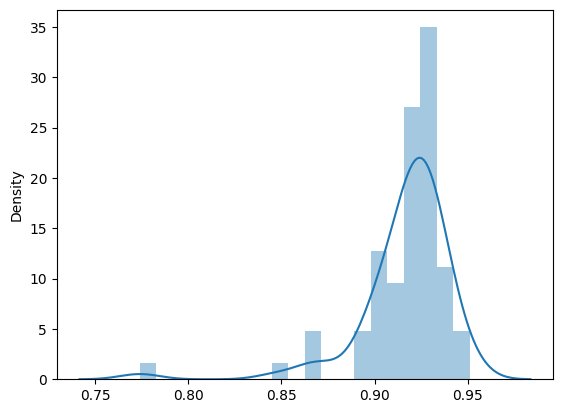

In [27]:
sns.distplot(x=scaled_df['total'])
plt.show()